In [1]:
import pandas as pd
import numpy as np

In [2]:
roll_df = pd.read_csv('Roll_Rate_data.csv')
roll_df.head()

,Loan Id,Reporting Month,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Loan Age,Maturity Date,Original LTV,DTI,FICO Origin,Delinquency,Bucket,Count,Include
0,100393376629,20-01-18,7.625,7.625,50000,32189.25,360,19-12-99,216,20-01-30,90,37,716,0,0,12,1
1,100393376629,20-02-18,7.625,7.625,50000,32038.33,360,19-12-99,217,20-01-30,90,37,716,0,0,12,1
2,100393376629,20-03-18,7.625,7.625,50000,31886.45,360,19-12-99,218,20-01-30,90,37,716,0,0,12,1
3,100393376629,20-04-18,7.625,7.625,50000,31733.60,360,19-12-99,219,20-01-30,90,37,716,0,0,12,1
4,100393376629,20-05-18,7.625,7.625,50000,31579.78,360,19-12-99,220,20-01-30,90,37,716,0,0,12,1


In [3]:
roll_df.drop(columns=['Bucket','Include', 'Count'], inplace=True)

In [4]:
roll_df['Reporting Month'] = pd.to_datetime( roll_df['Reporting Month'])

In [5]:
roll_df.dtypes

Loan Id                      int64
Reporting Month     datetime64[ns]
Original EIR               float64
Current EIR                float64
Original UPB                 int64
Current UPB                float64
Loan Term                    int64
Origination date            object
Loan Age                     int64
Maturity Date               object
Original LTV                 int64
DTI                          int64
FICO Origin                  int64
Delinquency                  int64
dtype: object

In [6]:
roll_df.head()

,Loan Id,Reporting Month,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Loan Age,Maturity Date,Original LTV,DTI,FICO Origin,Delinquency
0,100393376629,2018-01-20,7.625,7.625,50000,32189.25,360,19-12-99,216,20-01-30,90,37,716,0
1,100393376629,2018-02-20,7.625,7.625,50000,32038.33,360,19-12-99,217,20-01-30,90,37,716,0
2,100393376629,2018-03-20,7.625,7.625,50000,31886.45,360,19-12-99,218,20-01-30,90,37,716,0
3,100393376629,2018-04-20,7.625,7.625,50000,31733.60,360,19-12-99,219,20-01-30,90,37,716,0
4,100393376629,2018-05-20,7.625,7.625,50000,31579.78,360,19-12-99,220,20-01-30,90,37,716,0


In [7]:
#roll_df_lst_mnt = roll_df['Loan Id']
roll_df['Bucket'] = np.where(roll_df['Delinquency']>=6,6,roll_df['Delinquency'])
roll_df['Bucket'].value_counts()

0    181475
1      8615
6      3489
2      2405
3      1147
4       742
5       559
Name: Bucket, dtype: int64

In [8]:
cont_rpt_month = roll_df.groupby(['Reporting Month']).size()
cont_rpt_month

Reporting Month
2018-01-20    18341
2018-02-20    18037
2018-03-20    17656
2018-04-20    17306
2018-05-20    16972
2018-06-20    16671
2018-07-20    16315
2018-08-20    15992
2018-09-20    15699
2018-10-20    15390
2018-11-20    15165
2018-12-20    14888
dtype: int64

In [9]:
roll_df_1 = np.where(roll_df['Reporting Month'] == "2018-01-20")
roll_df_new = roll_df.loc[roll_df_1]
roll_df_new

,Loan Id,Reporting Month,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Loan Age,Maturity Date,Original LTV,DTI,FICO Origin,Delinquency,Bucket
0,100393376629,2018-01-20,7.625,7.625,50000,32189.25,360,19-12-99,216,20-01-30,90,37,716,0,0
12,101153021562,2018-01-20,7.750,7.750,70000,46573.74,360,19-12-99,216,20-01-30,80,52,719,1,1
24,101978414050,2018-01-20,7.875,7.875,34000,7968.38,360,19-10-99,218,20-11-29,80,32,684,0,0
36,102212231837,2018-01-20,8.625,8.625,80000,55926.11,360,20-01-00,215,20-02-30,67,50,772,0,0
48,104520606701,2018-01-20,8.000,8.000,140000,59740.87,360,19-11-99,217,20-12-29,47,23,748,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198377,130742676465,2018-01-20,5.875,5.875,169000,115275.54,360,20-11-05,145,20-12-35,75,56,724,0,0
198389,130742997486,2018-01-20,5.500,5.500,100000,76893.69,360,20-08-05,148,20-09-35,80,41,648,0,0
198401,130746600244,2018-01-20,5.750,4.375,260000,221403.62,360,20-09-05,147,20-01-55,68,49,681,0,0
198413,130747241872,2018-01-20,5.875,5.875,71000,54834.50,360,20-09-05,147,20-10-35,79,30,688,0,0


In [10]:
roll_df_new.shape

(18341, 15)

In [11]:
chk_1 = roll_df['Loan Id'].value_counts().reset_index()
chk_1.columns = ['Loan_Id', 'Count']
chk_1

,Loan_Id,Count
0,100393376629,12
1,110371318522,12
2,110416035358,12
3,110459902195,12
4,110480957530,12
...,...,...
18342,104648442222,1
18343,104933252003,1
18344,124373885464,1
18345,104866432493,1


In [12]:
Loan_Id_Req = chk_1[chk_1['Count'] == 12]
Loan_Id_Req.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14881 entries, 0 to 14880
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Loan_Id  14881 non-null  int64
 1   Count    14881 non-null  int64
dtypes: int64(2)
memory usage: 348.8 KB


In [13]:
roll_df_combine = pd.merge(roll_df,
                             Loan_Id_Req, 
                             left_on='Loan Id', 
                             right_on='Loan_Id',
                             how='inner')

Roll_df_Jan = roll_df_combine[['Loan Id' , 'Reporting Month', 'Bucket']]
Roll_df_Jan = Roll_df_Jan[Roll_df_Jan['Reporting Month'] == '2018-01-20']
#Roll_df_Jan

Roll_df_Dec = roll_df_combine[['Loan Id' , 'Reporting Month', 'Bucket']]
Roll_df_Dec = Roll_df_Dec[Roll_df_Dec['Reporting Month'] == '2018-12-20']
Roll_df_Dec

,Loan Id,Reporting Month,Bucket
11,100393376629,2018-12-20,0
23,101153021562,2018-12-20,0
35,101978414050,2018-12-20,0
47,102212231837,2018-12-20,0
59,104520606701,2018-12-20,0
...,...,...,...
178523,130699332150,2018-12-20,0
178535,130742676465,2018-12-20,0
178547,130742997486,2018-12-20,0
178559,130746600244,2018-12-20,1


In [14]:
Combine_Jan_Dec = pd.merge(Roll_df_Jan, 
                          Roll_df_Dec,
                          on='Loan Id',
                          how='inner')
Combine_Jan_Dec.drop(columns=['Reporting Month_x', 'Reporting Month_y'], inplace=True)
Combine_Jan_Dec.rename(columns={'Bucket_x' : 'Source',
                                'Bucket_y' : 'Destination'}, inplace=True)

In [15]:
Combine_Jan_Dec

,Loan Id,Source,Destination
0,100393376629,0,0
1,101153021562,1,0
2,101978414050,0,0
3,102212231837,0,0
4,104520606701,0,0
...,...,...,...
14876,130699332150,0,0
14877,130742676465,0,0
14878,130742997486,0,0
14879,130746600244,0,1


In [16]:
Roll_Rate = pd.pivot_table(data=Combine_Jan_Dec,
                           values='Loan Id',
                           index='Source',
                           columns='Destination',
                           aggfunc='count',
                           fill_value=0
                           )

Roll_Rate = Roll_Rate.reset_index(drop=True)
Roll_Rate['Total'] = Roll_Rate.sum(axis=1)
Roll_Rate

Destination,0,1,2,3,4,5,6,Total
0,13025,339,73,33,20,9,34,13533
1,373,226,63,28,11,11,23,735
2,72,49,27,16,8,5,19,196
3,56,20,12,12,2,5,14,121
4,50,15,4,2,0,3,16,90
5,32,8,4,0,3,2,12,61
6,33,7,6,3,3,3,90,145


In [17]:
print(Roll_Rate.columns)
print(len(Roll_Rate))

Index([0, 1, 2, 3, 4, 5, 6, 'Total'], dtype='object', name='Destination')
7


In [18]:
for i in range(len(Roll_Rate)):
     Roll_Rate.at[i, 'Roll_fwd'] = Roll_Rate.iloc[i,i+1:7].sum()
     Roll_Rate.at[i, 'Roll_bck'] = Roll_Rate.iloc[i,0:i].sum()
     Roll_Rate['Roll_fwd_%'] = ((Roll_Rate['Roll_fwd'] / Roll_Rate['Total'])*100).round(2)
     Roll_Rate['Roll_bck_%'] = ((Roll_Rate['Roll_bck'] / Roll_Rate['Total'])*100).round(2)
Roll_Rate

Destination,0,1,2,3,4,5,6,Total,Roll_fwd,Roll_bck,Roll_fwd_%,Roll_bck_%
0,13025,339,73,33,20,9,34,13533,508.0,0.0,3.75,0.00
1,373,226,63,28,11,11,23,735,136.0,373.0,18.50,50.75
2,72,49,27,16,8,5,19,196,48.0,121.0,24.49,61.73
3,56,20,12,12,2,5,14,121,21.0,88.0,17.36,72.73
4,50,15,4,2,0,3,16,90,19.0,71.0,21.11,78.89
5,32,8,4,0,3,2,12,61,12.0,47.0,19.67,77.05
6,33,7,6,3,3,3,90,145,0.0,55.0,0.00,37.93


In [28]:
df_Plot = Roll_Rate[['Roll_fwd_%' , 'Roll_bck_%']]

<AxesSubplot:xlabel='Bucket'>

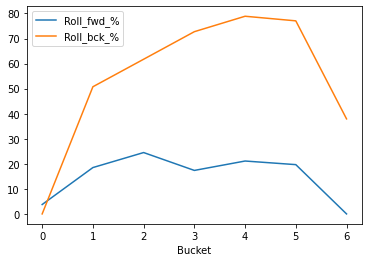

In [29]:
import matplotlib.pyplot as plt
ax = plt.gca() 
#use plot() method on the dataframe 
df_Plot.plot( y = 'Roll_fwd_%', ax = ax ) 
df_Plot.plot( y = 'Roll_bck_%' , ax = ax ) 